In [17]:
# Define your model

import torchvision.models as models
from efficientnet_pytorch import EfficientNet
import torchvision.models as models

model = models.densenet121(pretrained=True).eval()
# model = models.resnet18(pretrained=True).eval()
# model = models.resnet34(pretrained=True).eval()
# model = EfficientNet.from_pretrained('efficientnet-b0').eval()


In [18]:
from torchvision.io.image import read_image
from torchvision.transforms.functional import normalize, resize, to_pil_image
from torchcam.methods import LayerCAM
import torch

# Get your input
img = read_image("image/dog_and_cat_1.jpg")
# Preprocess it for your chosen model
input_tensor = normalize(resize(img, (224, 224)) / 255., [0.485, 0.456, 0.406], [0.229, 0.224, 0.225])

# cat_index1 = 282
# cat_index2 = 282

# with LayerCAM(model) as cam_extractor:
#     out = model(input_tensor.unsqueeze(0))
    
#     # 获取最可能的类别
#     match_index = out.squeeze(0).argmax().item()
#     print(f'Model predicted class index: {match_index}')
    
#     # 获取前3个最大值及其索引
#     topk_values, topk_indices = torch.topk(out.squeeze(0), k=3)
#     top3_indices = topk_indices.tolist()
#     print(f"Top 3 class indices: {top3_indices}")

#     # 提取激活图并合并
#     activation_maps = []
#     for index in top3_indices:
#         activation_map = cam_extractor(index, out)[0]  # 提取每个类别的激活图
#         activation_maps.append(activation_map)

#     # 定义权重并归一化
#     weights = torch.tensor([1, 1, 1], dtype=torch.float32)
#     weights /= weights.sum()

#     # 加权合并激活图
#     weighted_activation_map = sum(weight * activation_map for weight, activation_map in zip(weights, activation_maps))
#     combined_activation_map = weighted_activation_map

with LayerCAM(model) as cam_extractor:
    out = model(input_tensor.unsqueeze(0))
    match_index = out.squeeze(0).argmax().item()
    combined_activation_map = cam_extractor(282, out)
    print(match_index)



207


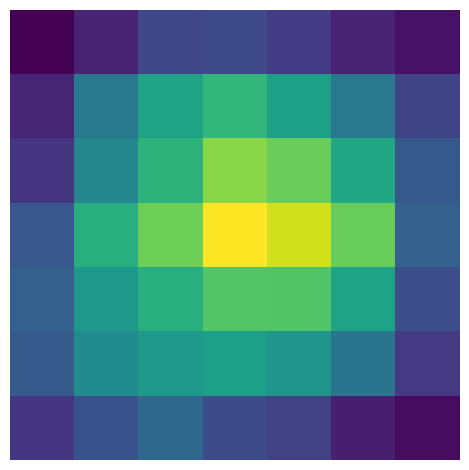

In [19]:
import matplotlib.pyplot as plt
# Visualize the raw CAM
plt.imshow(combined_activation_map[0].squeeze(0).numpy()); 
plt.axis('off'); 
plt.tight_layout(); 
plt.show()

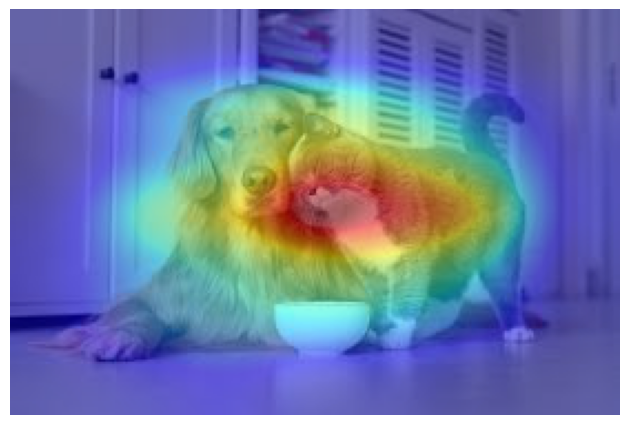

In [20]:
import matplotlib.pyplot as plt
from torchcam.utils import overlay_mask

# Resize the CAM and overlay it
result = overlay_mask(to_pil_image(img), to_pil_image(combined_activation_map[0].squeeze(0), mode='F'), alpha=0.5)
# Display it
plt.imshow(result); plt.axis('off'); plt.tight_layout(); plt.show()